<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/Clustering_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week4_KNN&neighbors/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# 변수별 값 분포 확인하기
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('-----------------------')

Gender
Female    112
Male       88
Name: Gender, dtype: int64
-----------------------
Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64
-----------------------
Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64
-----------------------
Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64
-----------------------


In [6]:
df.isnull().sum()
# 결측치 존재하지 않음

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# df의 성별
# 0 - female
# 1 - male 로 변경
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

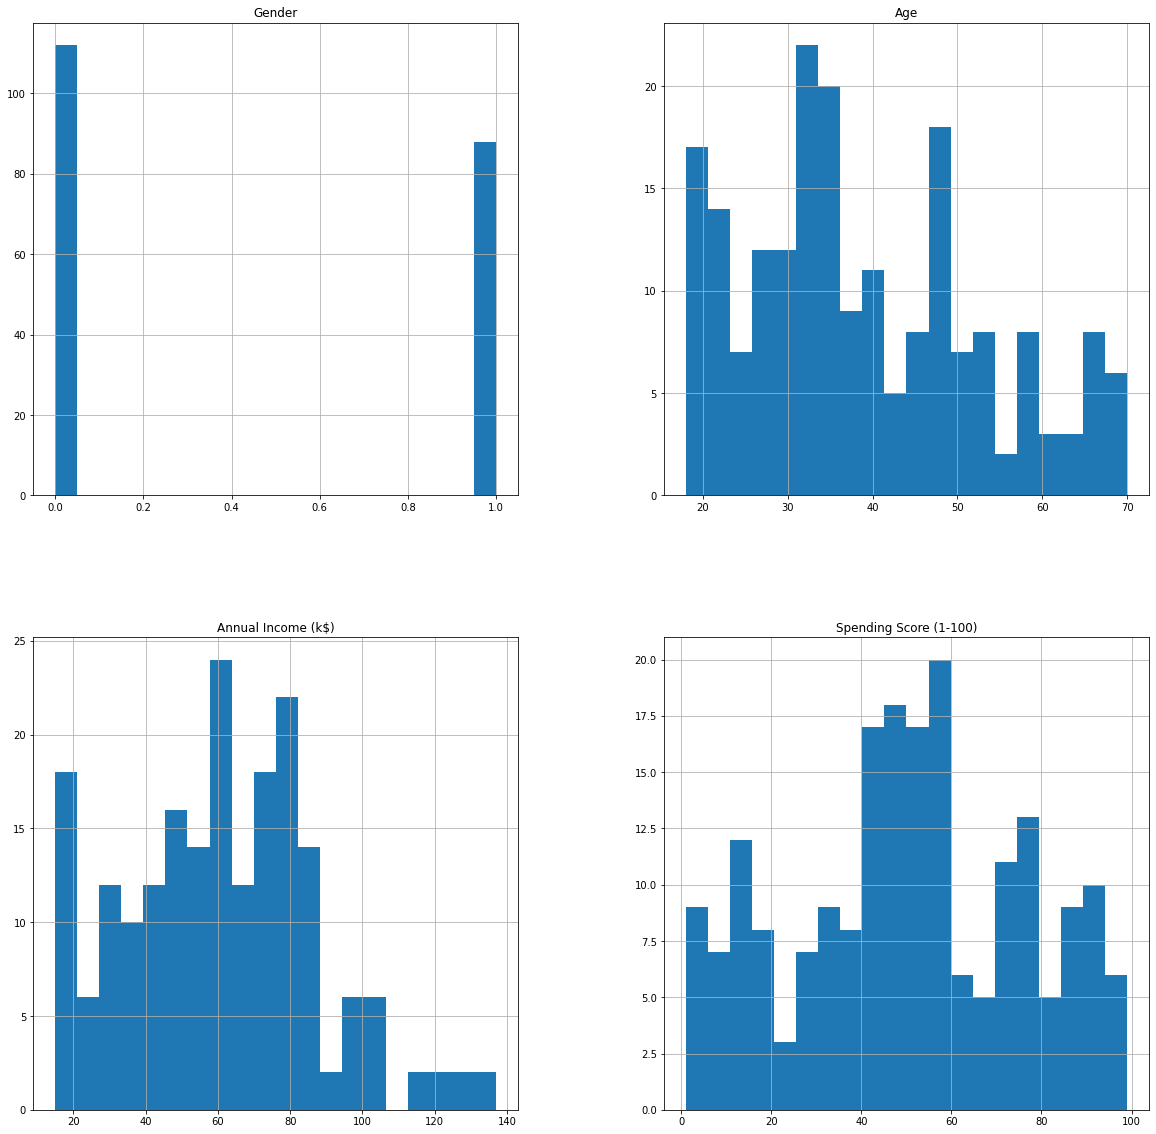

In [22]:
df.hist(bins=20, figsize=(20,20));
# 변수 값별 히스토그램 확인

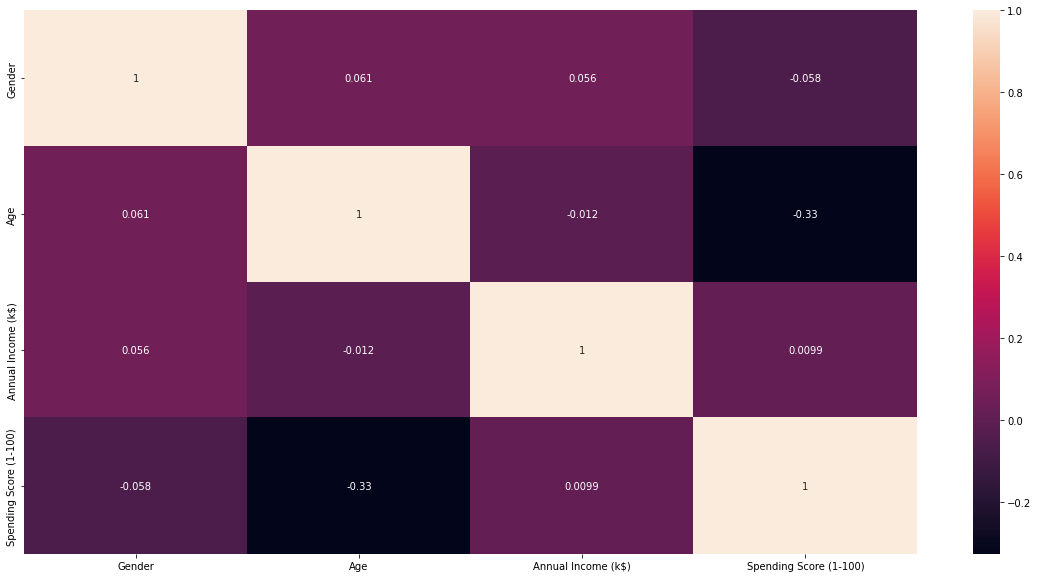

In [21]:
# 상관관계
import matplotlib.pyplot as plt
import seaborn as sns

df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
# 변수별 크게 상관관계가 있는 것 같지 않음

In [28]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(df)
df_trans = scaler.transform(df)

In [31]:
# modeling
from sklearn.cluster import KMeans

model=KMeans(n_clusters=10, random_state=123)
model.fit(df_trans)

KMeans(n_clusters=10, random_state=123)

In [38]:
df_trans = pd.DataFrame(df_trans)
df_trans['labels'] = model.labels_

In [39]:
df_trans

,0,1,2,3,labels
0,1.128152,-1.424569,-1.738999,-0.434801,4
1,1.128152,-1.281035,-1.738999,1.195704,4
2,-0.886405,-1.352802,-1.700830,-1.715913,0
3,-0.886405,-1.137502,-1.700830,1.040418,5
4,-0.886405,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,8
196,-0.886405,0.441365,2.497807,-0.861839,6
197,1.128152,-0.491602,2.497807,0.923953,1
198,1.128152,-0.491602,2.917671,-1.250054,9
